# Homework 1
## 2.2.a LASSO-regularized Logistic Regression model

**Import pandas and numpy for data manipulation**

Here we load the training and test data sets for flower identification and print their shapes to see the quantity of data.

In [10]:
import pandas as pd
import numpy as np

def read_dataset(feature_file, label_file):
    '''Read data set in *.csv format to dataframe in Pandas'''
    df_X = pd.read_csv(feature_file)
    df_Y = pd.read_csv(label_file)
    X = df_X.values #convert values in dataframe to np array
    y = df_Y.values
    return X,y

folder=''#'hw_data/logistic_regression/' #data folder name
file_id='iris' #data file_id

xtr_name = folder+file_id+'_X_train.csv' #specify X.vs.Y and Train.vs.Test
ytr_name = folder+file_id+'_y_train.csv'

X_train,y_train = read_dataset(xtr_name,ytr_name)

xte_name = folder+file_id+'_X_test.csv' #specify X.vs.Y and Train.vs.Test
yte_name = folder+file_id+'_y_test.csv'

X_test,y_test = read_dataset(xte_name,yte_name)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (112, 2)
y_train shape:  (112, 1)
X_test shape:  (38, 2)
y_test shape:  (38, 1)


**Normalize the features and train the model**

Here we run through multiple values of alpha to find the optimal value. 

In [11]:
def normalize_features(X_train, X_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler() #call a function
    scaler.fit(X_train) #calculate mean, std in X train
    X_train_norm = scaler.transform(X_train) #apply normalization
    X_test_norm = scaler.transform(X_test)
    return X_train_norm, X_test_norm

X_train_norm,X_test_norm = normalize_features(X_train,X_test) #normal sets

def logreg_model(X_train, y_train, X_test, y_test, alpha):
    from sklearn.linear_model import LogisticRegression
    myreg = LogisticRegression(C=alpha,solver='saga') # initialize the model, 'saga' chosen for L1 prior/LASSO
    myreg.fit(X_train,y_train.ravel()) #learn from training data
    y_pred = myreg.predict(X_test) #predict the test data, X_test: features
    
    coeffs = myreg.coef_
    intercept = myreg.intercept_
    
    return y_pred, coeffs, intercept, myreg

def accuracy(y_pred,y_test):
    return 100 - np.sum(abs(y_pred - y_test.T))/y_pred.shape[0]*100

for alpha in [10e10,10e5,10e2,10,5,1,0.5,0.1,10e-3,10e-5]:
    y_pred,coeffs,intercept,logreg = logreg_model(X_train_norm, y_train, X_test_norm, y_test, alpha)

    print('Alpha:', alpha)
    print('coeffs:',coeffs[0][0],coeffs[0][1])
    print('intercept:',intercept[0])
    print('accuracy:', accuracy(y_pred,y_test))
    print('')

Alpha: 100000000000.0
coeffs: 0.03926629918799787 -1.29223380034508
intercept: -1.0988533486376528
accuracy: 63.15789473684211

Alpha: 1000000.0
coeffs: 0.03916425314790213 -1.2923355660845577
intercept: -1.0988331592228828
accuracy: 63.15789473684211

Alpha: 1000.0
coeffs: 0.0391616742465867 -1.2920725532359836
intercept: -1.0989425010533473
accuracy: 63.15789473684211

Alpha: 10
coeffs: 0.03876416436044233 -1.280564403561626
intercept: -1.0948113426135966
accuracy: 63.15789473684211

Alpha: 5
coeffs: 0.038471506253737756 -1.2691668427459388
intercept: -1.0910080037649612
accuracy: 63.15789473684211

Alpha: 1
coeffs: 0.03587897813227513 -1.187592362513913
intercept: -1.0634088121346965
accuracy: 63.15789473684211

Alpha: 0.5
coeffs: 0.03343190178479075 -1.1040154567087364
intercept: -1.0367550950868336
accuracy: 63.15789473684211

Alpha: 0.1
coeffs: 0.023374438085168623 -0.7452265227353256
intercept: -0.9324491465112735
accuracy: 63.15789473684211

Alpha: 0.01
coeffs: 0.00818619533775

## Predictor:

$\alpha=1000$,

$p_c(x) = \sigma(c^Tx) = 1.0/(1+exp(-1.099 + 0.0392x_1 - 1.292x_2))$

accuracy: 63.16%

In [12]:
class0 = sum(y_test)
total = y_test.size
class0 = total - class0
fraction = class0[0]/total
print('class0:',class0[0]) #How many belong to class zero?
print('total:',total) #How many total?
print('22/38: %f' %fraction)

class0: 22
total: 38
22/38: 0.578947


**Varying alpha**

Varying across alpha, we see that small values of alpha causes worse classification, and in fact misclassify all in class one as class zero. All inputs are interpretted as class zero. This can be seen by plotting the decision boundary, and supported by class0 being 22/38 = 57.9% and the correct identification rate also being 57.9%.

Alpha values larger than 0.1 all have similar identification rates, but shift the decision boundary to the limit at approximately alpha=1000. 

In [16]:
def plot_decision_boundary(X, y, logreg):
    import matplotlib.pyplot as plt
    %matplotlib inline
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    pred_labels = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    # Plot the predicted value
    pred_labels= pred_labels.reshape(xx.shape)
    plt.figure(1, figsize=(10, 8))
    plt.pcolormesh(xx, yy, pred_labels, cmap=plt.cm.Paired)
    # Plot data set
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', s=100, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

## 2.2.b Decision Boundary

Here we see small alpha lowers the decision boundary so that all data are classified as type zero, or blue. Additionally, any alpha above 1000 fails to push the decision boundary above the one shown below.

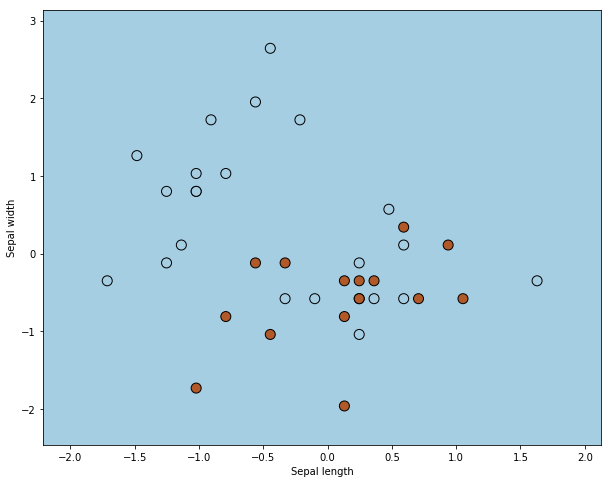

In [14]:
alpha = 0.001
y_pred,coeffs,intercept,logreg = logreg_model(X_train_norm, y_train, X_test_norm, y_test, alpha)
plot_decision_boundary(X_test_norm, y_test, logreg)

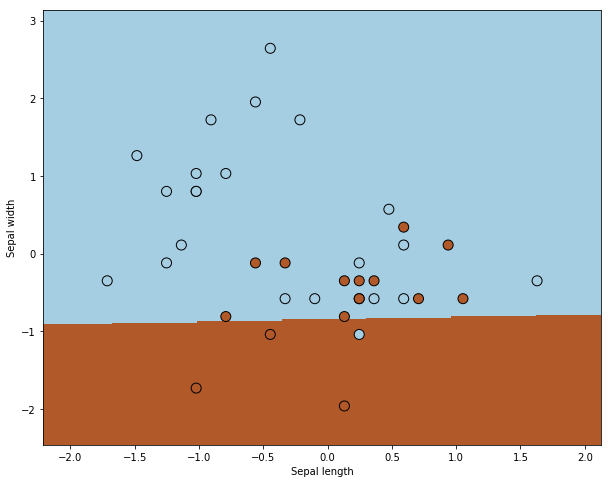

In [15]:
alpha = 1000
y_pred,coeffs,intercept,logreg = logreg_model(X_train_norm, y_train, X_test_norm, y_test, alpha)
plot_decision_boundary(X_test_norm, y_test, logreg)